In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler 
import category_encoders as ce
from sklearn import tree
import graphviz

In [2]:
car_eval_data = pd.read_csv('car_evaluation.csv',header=None)
car_eval_data[:5]

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
car_eval_data.shape

(1728, 7)

In [4]:
car_eval_data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [5]:
car_eval_data[:5]

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
car_eval_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [8]:
car_eval_data[col_names].value_counts()

buying  maint  doors  persons  lug_boot  safety  class
high    high   2      2        big       high    unacc    1
med     med    4      4        med       med     acc      1
                      more     small     low     unacc    1
                                         high    acc      1
                               med       med     acc      1
                                                         ..
low     low    3      2        med       med     unacc    1
                                         low     unacc    1
                                         high    unacc    1
                               big       med     unacc    1
vhigh   vhigh  5more  more     small     med     unacc    1
Length: 1728, dtype: int64

In [9]:
for colls in col_names:
    print(car_eval_data[colls].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [10]:
car_eval_data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [11]:
car_eval_data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [12]:
feat_x = car_eval_data.drop(columns='class')
targ_y = car_eval_data['class']

In [13]:
feat_x.shape

(1728, 6)

In [14]:
x_Train,x_Test,y_Train,y_Test = train_test_split(feat_x,targ_y,test_size=0.3,random_state=42)

In [15]:
x_Train.shape

(1209, 6)

In [16]:
x_Test.shape

(519, 6)

In [17]:
encodes = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
x_Train = encodes.fit_transform(x_Train)
x_Test = encodes.fit_transform(x_Test)

In [18]:
x_Train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


In [19]:
x_Test.head()

,buying,maint,doors,persons,lug_boot,safety
599,1,1,1,1,1,1
1201,2,2,2,2,1,2
628,1,1,3,1,2,2
1498,3,1,3,2,1,2
1263,2,2,1,3,1,3


In [20]:
decision_tree_classifier = DecisionTreeClassifier(criterion='gini',max_depth=3)
decision_tree_classifier

DecisionTreeClassifier(max_depth=3)

In [21]:
decision_tree_classifier.fit(x_Train,y_Train)

DecisionTreeClassifier(max_depth=3)

In [22]:
dec_tree_predict = decision_tree_classifier.predict(x_Test)
dec_tree_predict[:5]

array(['acc', 'unacc', 'unacc', 'unacc', 'unacc'], dtype=object)

In [23]:
print(f"Classifier's accuracy score= {accuracy_score(y_Test,dec_tree_predict)}")

Classifier's accuracy score= 0.6473988439306358


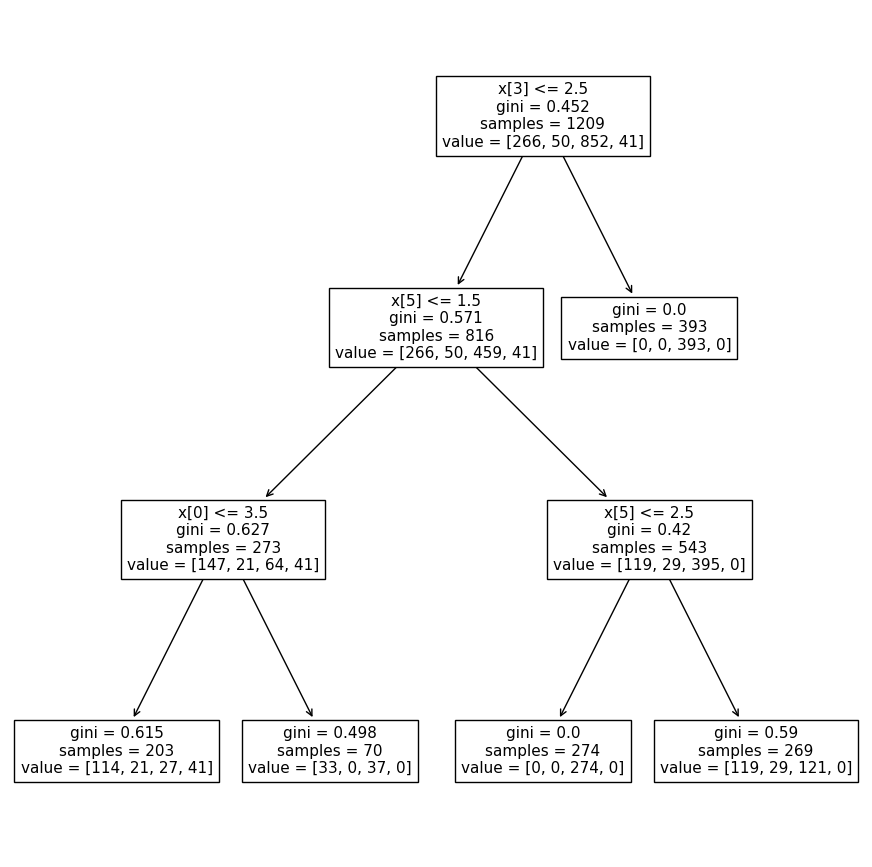

In [24]:
plt.figure(figsize=(11,11))
tree.plot_tree(decision_tree_classifier.fit(x_Train,y_Train))
plt.show()

In [25]:
dot_dt = tree.export_graphviz(
    decision_tree_classifier,
    out_file=None,
    feature_names=x_Train.columns,
    class_names=y_Train,
    filled=True,
    rounded=True,
    special_characters=True
)
graphs = graphviz.Source(dot_dt)
graphs

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH